In [1]:
import os
import json
from tqdm import tqdm
from pathlib import Path

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from src.configs import config

In [2]:
TRAIN_PATH = config.TRAIN_PATH
POLYGON_PATH = config.POLYGON_PATH

In [4]:
df_tile = pd.read_csv("/data/tile_meta.csv")
df_tile.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008


In [5]:
print(f'Total WSIs : {df_tile.source_wsi.nunique()}')
print(f'Total Datasets : {df_tile.dataset.nunique()}')

Total WSIs : 13
Total Datasets : 3


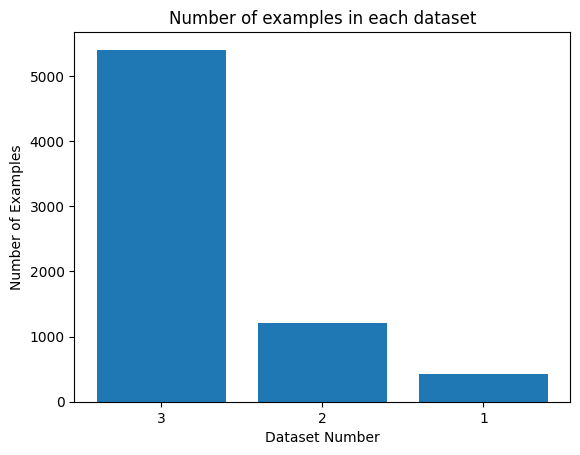

Image Data in each dataset: 
3    5400
2    1211
1     422
Name: dataset, dtype: int64


In [17]:
#bar plot with number of images on y-axis and dataset on x-axis
plt.bar(list(map(str, df_tile['dataset'].value_counts().index)), df_tile['dataset'].value_counts().values)

plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Number of images in each dataset')

plt.show()

print(f"Image data in each dataset: \n{df_tile['dataset'].value_counts()}")

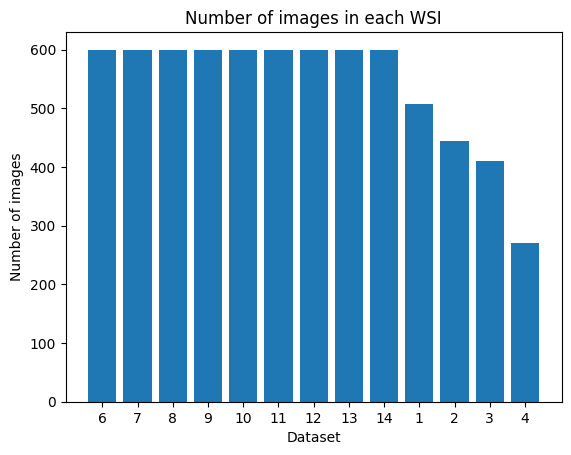

Number of images in each WSI: 
6     600
7     600
8     600
9     600
10    600
11    600
12    600
13    600
14    600
1     507
2     445
3     410
4     271
Name: source_wsi, dtype: int64


In [19]:
#bar plot for image distribution in wsi
plt.bar(list(map(str, df_tile['source_wsi'].value_counts().index)), df_tile['source_wsi'].value_counts().values)

plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Number of images in each WSI')

plt.show()

print(f"Number of images in each WSI: \n{df_tile['source_wsi'].value_counts()}")

In [15]:
data1 = df_tile[df_tile['dataset']==1].reset_index(drop=True)
data1.head()

,id,source_wsi,dataset,i,j
0,0033bbc76b6b,1,1,10240,43008
1,00656c6f2690,1,1,10240,46080
2,0067d5ad2250,2,1,23552,22528
3,00d75ad65de3,1,1,8192,39424
4,00da70813521,1,1,10240,46592


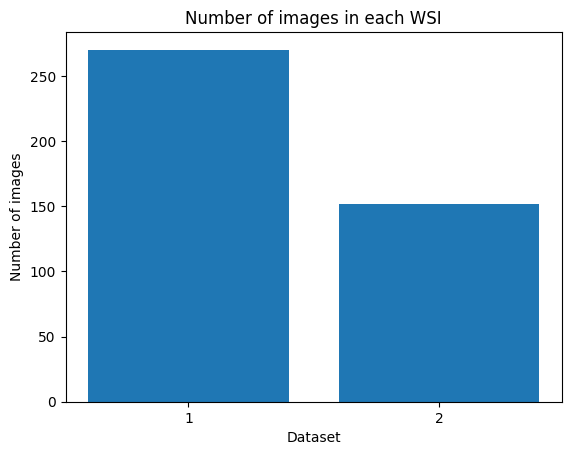

Number of images in each WSI in dataset1 : 
1    270
2    152
Name: source_wsi, dtype: int64


In [38]:
#plot figure to evaluate the image distribution for wsi in dataset1
plt.bar(list(map(str, data1['source_wsi'].value_counts().index)), data1['source_wsi'].value_counts().values)

plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Number of images in each WSI')

plt.show()

print(f"Number of images in each WSI in dataset1 : \n{data1['source_wsi'].value_counts()}")

In [14]:
data2 = df_tile[df_tile['dataset']==2].reset_index(drop=True)
data2.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,00168d1b7522,2,2,14848,14884
2,003504460b3a,3,2,8192,11776
3,004daf1cbe75,3,2,6144,11264
4,005715f0a313,3,2,8192,10752


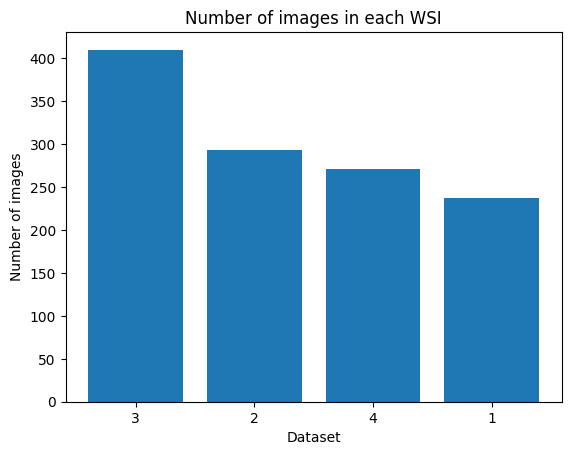

Number of images in each WSI in dataset2 : 
3    410
2    293
4    271
1    237
Name: source_wsi, dtype: int64


In [39]:
#plot figure to evaluate the image distribution for wsi in dataset1
plt.bar(list(map(str, data2['source_wsi'].value_counts().index)), data2['source_wsi'].value_counts().values)

plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Number of images in each WSI')

plt.show()

print(f"Number of images in each WSI in dataset2 : \n{data2['source_wsi'].value_counts()}")

In [13]:
data3 = df_tile[df_tile['dataset']==3].reset_index(drop=True)
data3.head()

,id,source_wsi,dataset,i,j
0,000e79e206b7,6,3,10240,29184
1,00176a88fdb0,7,3,14848,25088
2,00359ab8338b,8,3,6656,9216
3,00488ca285ee,9,3,8192,37888
4,004fb033dd09,7,3,20480,31232


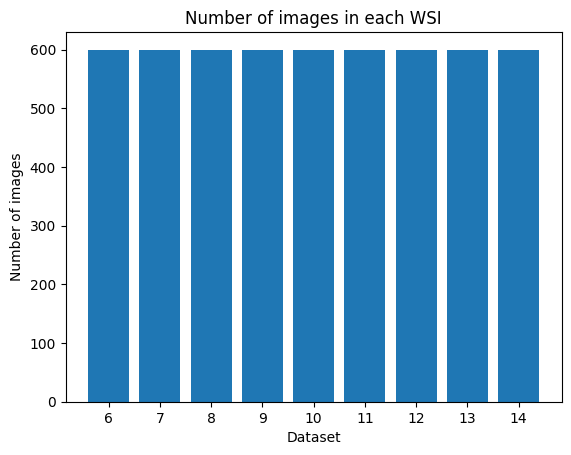

Number of images in each WSI in dataset3 : 
6     600
7     600
8     600
9     600
10    600
11    600
12    600
13    600
14    600
Name: source_wsi, dtype: int64


In [40]:
#plot figure to evaluate the image distribution for wsi in dataset1
plt.bar(list(map(str, data3['source_wsi'].value_counts().index)), data3['source_wsi'].value_counts().values)

plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Number of images in each WSI')

plt.show()

print(f"Number of images in each WSI in dataset3 : \n{data3['source_wsi'].value_counts()}")

In [11]:
s1 = df_tile[df_tile['source_wsi']==1]
s2 = df_tile[df_tile['source_wsi']==2]
s3 = df_tile[df_tile['source_wsi']==3]
s4 = df_tile[df_tile['source_wsi']==4]

In [19]:
#couldn't find any use of this data
df_wsi = pd.read_csv("/data/wsi_meta.csv")
df_wsi

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


In [5]:
#read json file and create a list of polgons for easy manipulation
with open(POLYGON_PATH, 'r') as json_file:
    json_list = list(json_file)
    
polygons = []
for json_str in json_list:
    polygons.append(json.loads(json_str))

In [30]:
print(f'Total images: {len(os.listdir(TRAIN_PATH))}')
print(f"Number of annotated images: {len(polygons)}")
print(f"Number of images with no annotations (belonging to dataset-3): {data3['id'].nunique()}")

Total images: 7033
Number of annotated images: 1633
Number of images with no annotations (belonging to dataset-3): 5400


In [31]:
annotated_img = []
img_list = os.listdir(TRAIN_PATH)
for filename in img_list:
    img_name = os.path.splitext(filename)[0]
    for polygon in polygons:
        if img_name == polygon['id']:
            annotated_img.append(filename)

In [87]:
def display_img(image_path, df, polygons):
    img_ids = df['id'][:5]
    for img_id in img_ids:
        img = Image.open(os.path.join(image_path, f'{img_id}.tif'))
        #img = img.resize((1024, 1024))
        img = np.asarray(img)
        mask = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        for polygon in polygons:
            if img_id == polygon['id']:
                annot = polygon['annotations']
                blood_vessels = 0
                glomerulus = 0
                unsure = 0
                for ann in annot:
                    if ann['type'] == 'blood_vessel':
                        color = (0,255,0)
                        blood_vessels += 1
                    elif ann['type'] == 'glomerulus':
                        color = (255,0,0)
                        glomerulus += 1
                    elif ann['type'] == 'unsure':
                        color = (0,0,255)
                        unsure += 1
                    pts = np.array(ann['coordinates']).reshape(-1, 1, 2)
                    for pt in pts:
                        mask[pt[:, 1], pt[:, 0]] = 1
                    cv2.fillPoly(mask, [pts], color) #uncomment to fill mask
                    #cv2.polylines(mask, pts, True, color, 1) #uncomment to draw only border mask
                    cv2.polylines(img, pts, True, color, 2)
                print(f'Image id is: {img_id}')
                print(f'{blood_vessels = } / {glomerulus = }  / {unsure = } in the image')

        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        axes[0].imshow(img)
        axes[0].set_title('Image')
        axes[0].axis('on')

        axes[1].imshow(mask)
        axes[1].set_title('Mask')
        axes[1].axis('on')

        #plt.savefig("inspect/dataset2/" + f'{img_id}.png')
        #plt.close(fig)
        plt.show()

Image id is: 0006ff2aa7cd
blood_vessels = 8 / glomerulus = 1  / unsure = 0 in the image


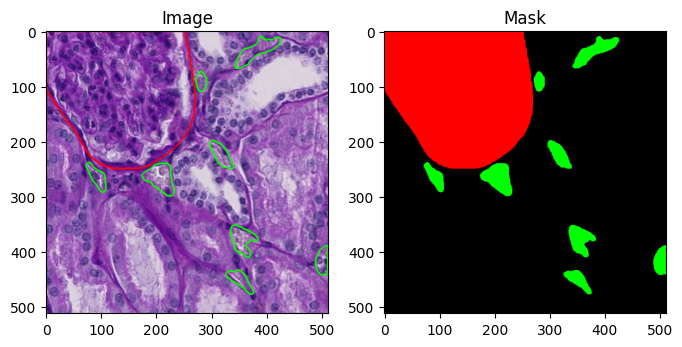

Image id is: 00168d1b7522
blood_vessels = 1 / glomerulus = 1  / unsure = 0 in the image


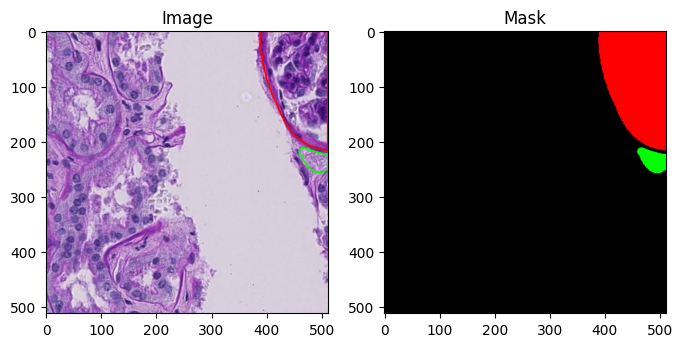

Image id is: 003504460b3a
blood_vessels = 7 / glomerulus = 0  / unsure = 0 in the image


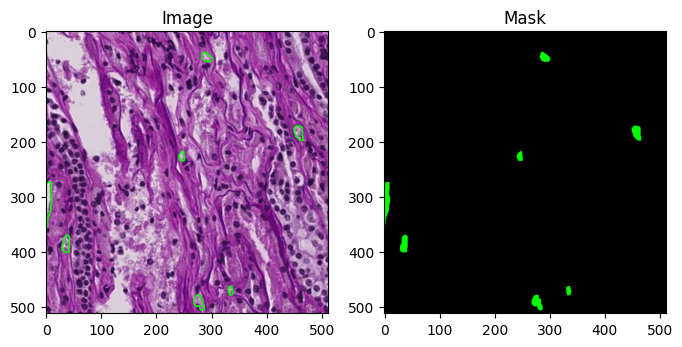

Image id is: 004daf1cbe75
blood_vessels = 10 / glomerulus = 1  / unsure = 0 in the image


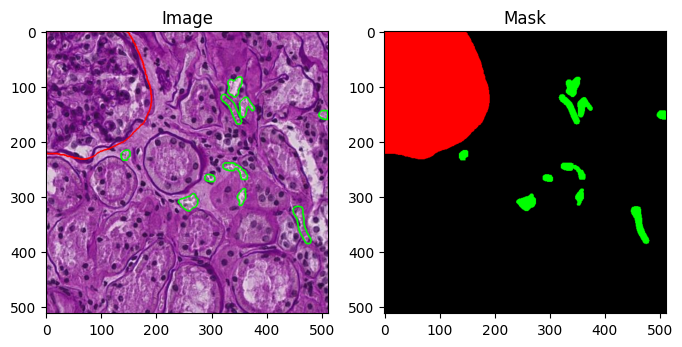

Image id is: 005715f0a313
blood_vessels = 4 / glomerulus = 2  / unsure = 0 in the image


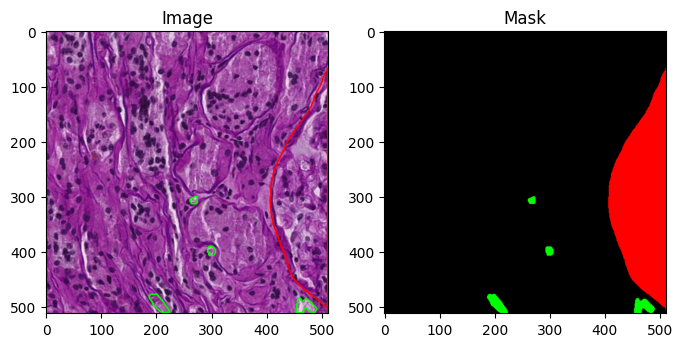

In [88]:
display_img(TRAIN_PATH, data2, polygons)

In [34]:
img_id = []
classes = []
coords = []
for json_str in json_list:
    result = json.loads(json_str)
    image_id = result['id']
    for re in result['annotations']:
        img_id.append(image_id)
        classes.append(re['type'])
        coords.append(re['coordinates'])
    
    
df = pd.DataFrame([img_id,classes,coords]).T
df.columns = ['id','type','coords']
df = df.explode(column='coords').reset_index(drop=True)

In [84]:
def mask_to_bboxes(mask_coords):
    bboxes = []
    area_list = []
    for mask_points in mask_coords:
        mask_points = np.array(mask_points)
        xmin = np.min(mask_points[:, 0])  
        ymin = np.min(mask_points[:, 1])  
        xmax = np.max(mask_points[:, 0])  
        ymax = np.max(mask_points[:, 1])  
        bbox = [xmin, ymin, xmax, ymax]
        area = (xmax - xmin) * (ymax - ymin)
        bboxes.append(bbox)
        area_list.append(area)
    return bboxes, area_list

In [85]:
masks_coords = df['coords']
bboxes, area = mask_to_bboxes(masks_coords)
df['bboxes'] = bboxes
df['area'] = area

In [86]:
df

,id,type,coords,bboxes,area
0,0006ff2aa7cd,glomerulus,"[[167, 249], [166, 249], [165, 249], [164, 249...","[0, 0, 270, 249]",67230
1,0006ff2aa7cd,blood_vessel,"[[283, 109], [282, 109], [281, 109], [280, 109...","[272, 73, 291, 109]",684
2,0006ff2aa7cd,blood_vessel,"[[104, 292], [103, 292], [102, 292], [101, 292...","[72, 238, 108, 292]",1944
3,0006ff2aa7cd,blood_vessel,"[[505, 442], [504, 442], [503, 442], [502, 442...","[489, 389, 511, 442]",1166
4,0006ff2aa7cd,blood_vessel,"[[375, 477], [374, 477], [373, 477], [372, 477...","[326, 434, 376, 477]",2150
...,...,...,...,...,...
17513,ffd3d193c71e,blood_vessel,"[[184, 308], [183, 308], [182, 308], [181, 308...","[173, 285, 195, 308]",506
17514,ffd3d193c71e,blood_vessel,"[[42, 92], [41, 92], [40, 92], [39, 92], [38, ...","[28, 33, 48, 92]",1180
17515,ffd3d193c71e,blood_vessel,"[[287, 480], [286, 480], [285, 480], [284, 480...","[273, 459, 296, 480]",483
17516,ffd3d193c71e,blood_vessel,"[[493, 388], [492, 388], [491, 388], [490, 388...","[476, 269, 500, 388]",2856


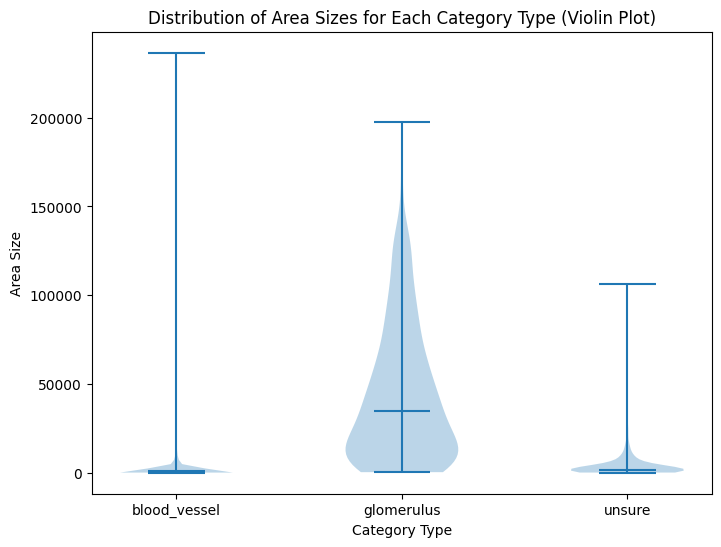

In [90]:
plt.figure(figsize=(8, 6))
plt.violinplot([df[df['type'] == 'blood_vessel']['area'],
                df[df['type'] == 'glomerulus']['area'],
                df[df['type'] == 'unsure']['area']],
               showmedians=True)
plt.xticks([1, 2, 3], ['blood_vessel', 'glomerulus', 'unsure'])
plt.xlabel('Category')
plt.ylabel('Area')
plt.title('Distribution of area for each category')
plt.show()

In [53]:
df_blood = df[df['type']=='blood_vessel'].reset_index(drop=True)
df_blood

,id,type,coords
0,0006ff2aa7cd,blood_vessel,"[[283, 109], [282, 109], [281, 109], [280, 109..."
1,0006ff2aa7cd,blood_vessel,"[[104, 292], [103, 292], [102, 292], [101, 292..."
2,0006ff2aa7cd,blood_vessel,"[[505, 442], [504, 442], [503, 442], [502, 442..."
3,0006ff2aa7cd,blood_vessel,"[[375, 477], [374, 477], [373, 477], [372, 477..."
4,0006ff2aa7cd,blood_vessel,"[[368, 410], [367, 410], [366, 410], [365, 410..."
...,...,...,...
16049,ffd3d193c71e,blood_vessel,"[[184, 308], [183, 308], [182, 308], [181, 308..."
16050,ffd3d193c71e,blood_vessel,"[[42, 92], [41, 92], [40, 92], [39, 92], [38, ..."
16051,ffd3d193c71e,blood_vessel,"[[287, 480], [286, 480], [285, 480], [284, 480..."
16052,ffd3d193c71e,blood_vessel,"[[493, 388], [492, 388], [491, 388], [490, 388..."
